In [1]:
#importing the libraries
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler,RobustScaler
from scipy.sparse import vstack,hstack,csr_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline
import pickle
from sklearn.metrics.pairwise import cosine_distances,cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.1/1662.8MB downloaded


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [4]:
data.tail()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
1996,fffe3100390039003700,Reynaldo Ellis,24,single,m,straight,socially,never,69.0,student,...,yes,english,not interested,average,2.0,no,i grew up playing instruments and singing and ...,craft,reading,same city
1997,fffe3100390039003800,Laura Adams,23,single,f,gay,socially,never,68.0,sales / marketing / biz dev,...,no,english,not interested,athletic,2.0,no,im a 23 yr old female born and raised in color...,makeup,acting,same state
1998,fffe3100390039003900,Daniel Duran,28,single,m,straight,rarely,never,71.0,sales / marketing / biz dev,...,no,english,not interested,athletic,3.0,no,i've spent the last 10 years working in the ou...,singing,politics,anywhere
1999,fffe3200300030003000,Robert Orr,32,seeing someone,m,straight,not at all,never,68.0,other,...,no,"english (fluently), japanese (okay)",somewhat interested,thin,3.0,no,"i am that i am. more and more, my spiritual l...",music,cooking,same city
2000,fffe3200300030003100,Mildred Harwell,41,single,f,straight,socially,never,67.0,artistic / musical / writer,...,no,"english (fluently), spanish (okay)",somewhat interested,curvy,2.0,no,"love travel, love food, love wine and love sat...",movies,makeup,anywhere


In [5]:
data.shape

(2001, 22)

In [6]:
data.columns

Index(['user_id', 'username', 'age', 'status', 'sex', 'orientation', 'drinks',
       'drugs', 'height', 'job', 'location', 'pets', 'smokes', 'language',
       'new_languages', 'body_profile', 'education_level', 'dropped_out',
       'bio', 'interests', 'other_interests', 'location_preference'],
      dtype='object')

In [7]:
data.isna().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
interests              0
other_interests        0
location_preference    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

In [18]:
data.describe(include='all')

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
count,2001,2001,2001.000000,2001,2001,2001,2001,2001,2001.000000,2001,2001,2001,2001,2001,2001,2001,2001.000000,2001,2001,2001,2001,2001
unique,2001,1995,NaN,4,2,3,6,3,NaN,21,70,15,5,575,3,12,NaN,2,2001,31,31,3
top,fffe370031003600,Daniel Harris,NaN,single,m,straight,socially,never,NaN,other,"san francisco, california",likes dogs and likes cats,no,english,not interested,average,NaN,no,i grew up with 4 brothers and a very close fam...,music,music,same city
freq,1,2,NaN,1867,1139,1736,1393,1586,NaN,286,911,743,1630,545,1050,557,NaN,1898,1,155,158,1169
mean,NaN,NaN,33.072464,NaN,NaN,NaN,NaN,NaN,68.289855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.932534,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,10.483189,NaN,NaN,NaN,NaN,NaN,3.895246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812371,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

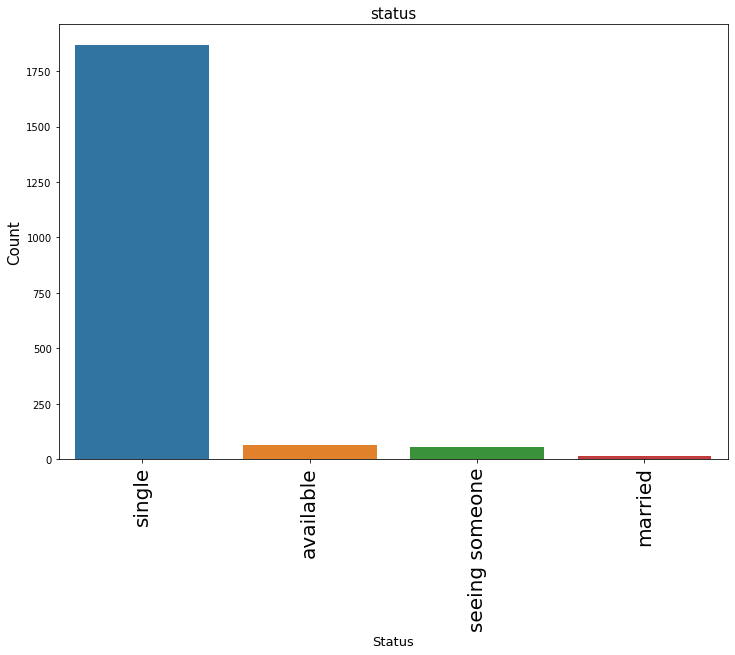

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data.status,order=(data.status.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("Status", fontsize =13)
plt.xticks(rotation=90,fontsize=20)
plt.title('status',fontsize=15)
plt.show()

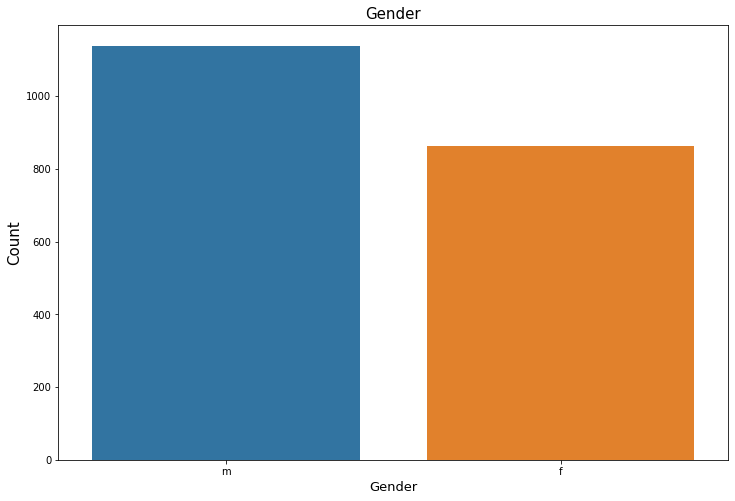

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data.sex,order=(data.sex.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("Gender", fontsize =13)
plt.title('Gender',fontsize=15)
plt.show()

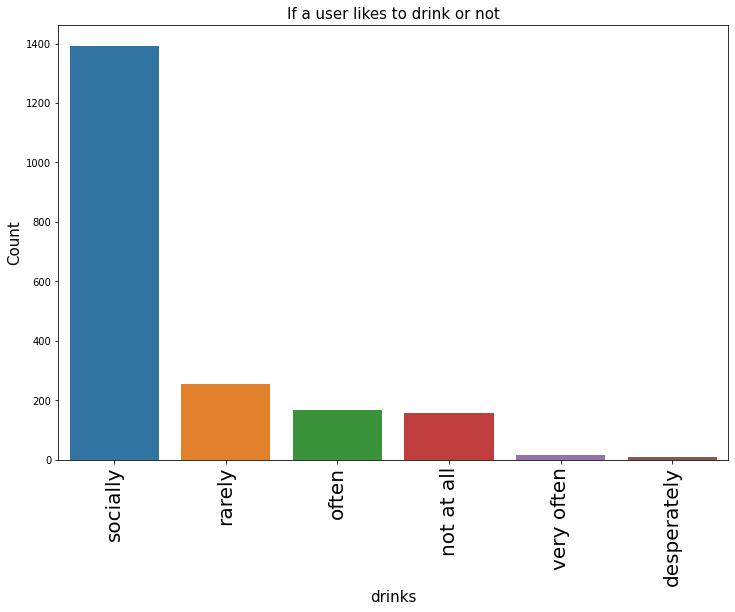

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data.drinks,order=(data.drinks.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("drinks", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('If a user likes to drink or not',fontsize=15)
plt.show()

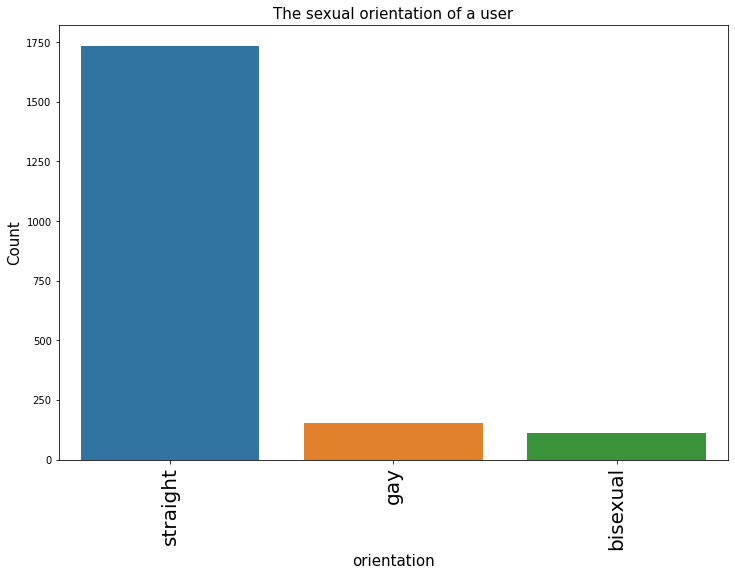

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data.orientation,order=(data.orientation.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("orientation", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('The sexual orientation of a user',fontsize=15)
plt.show()

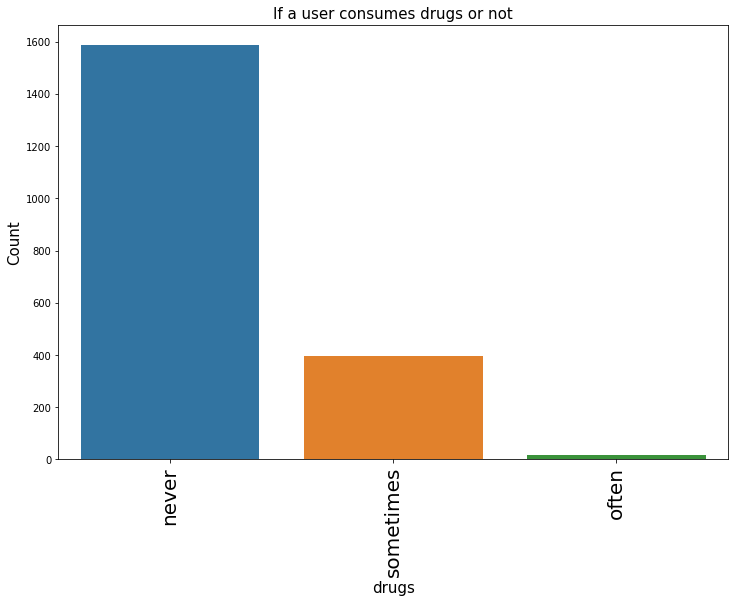

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data.drugs,order=(data.drugs.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("drugs", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('If a user consumes drugs or not',fontsize=15)
plt.show()

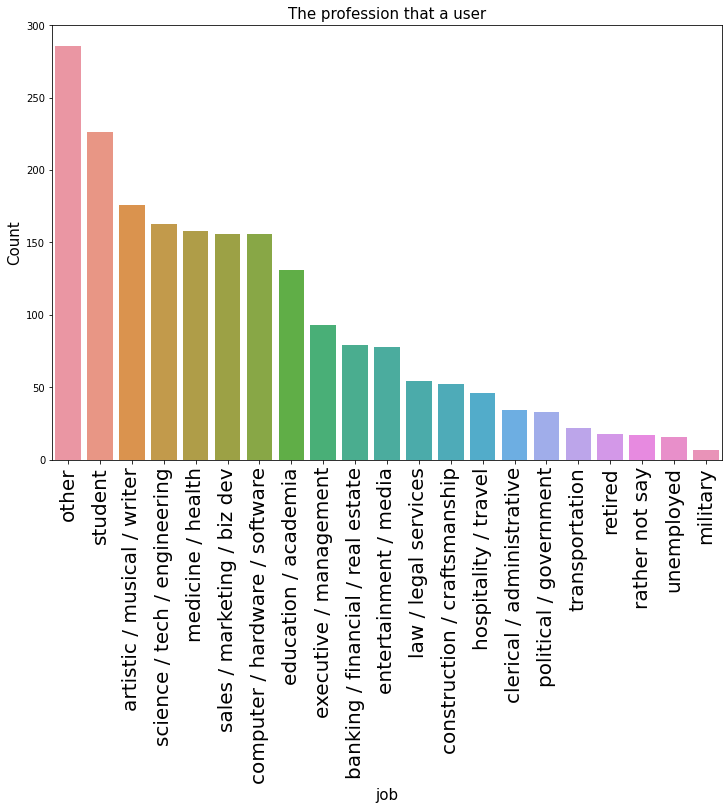

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(data.job,order=(data.job.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("job", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('The profession that a user',fontsize=15)
plt.show()

In [32]:
data.location.value_counts()

san francisco, california     911
oakland, california           250
berkeley, california          146
san mateo, california          56
palo alto, california          45
                             ... 
stockton, california            1
point richmond, california      1
foster city, california         1
phoenix, arizona                1
lagunitas, california           1
Name: location, Length: 70, dtype: int64

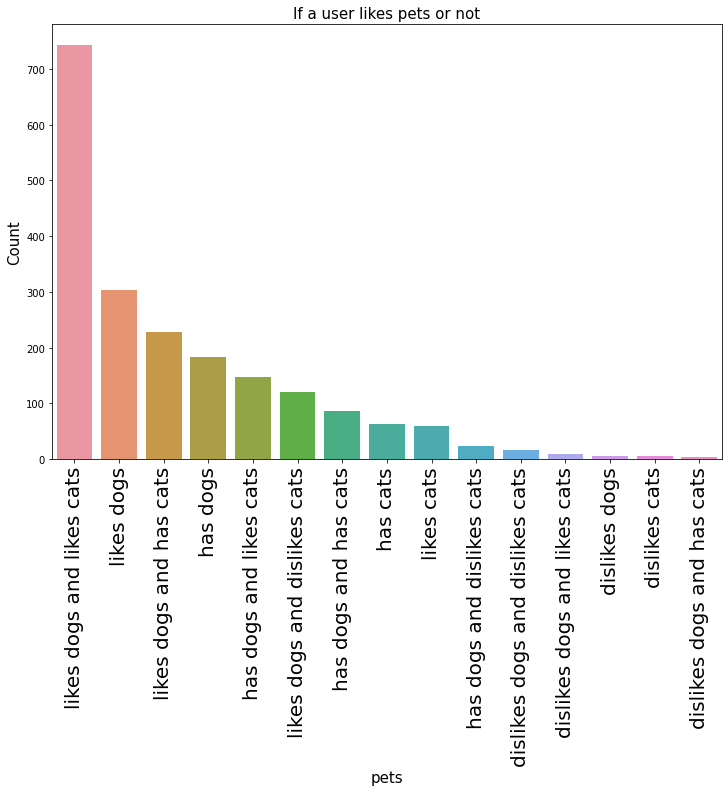

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data.pets,order=(data.pets.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("pets", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('If a user likes pets or not',fontsize=15)
plt.show()

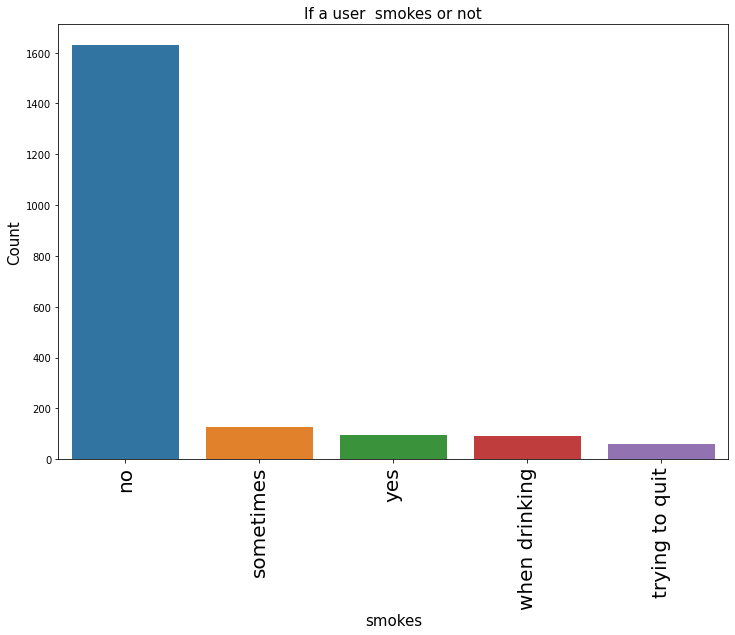

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(data.smokes,order=(data.smokes.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("smokes", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('If a user  smokes or not',fontsize=15)
plt.show()

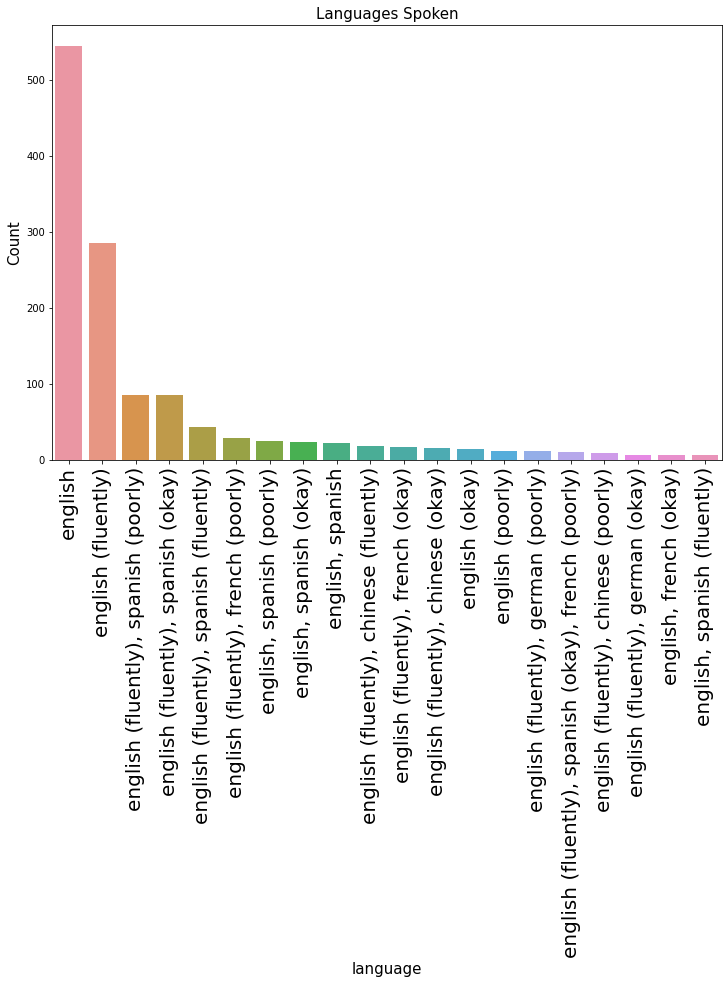

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(data.language,order=(data.language.value_counts()[:20].index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("language", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Languages Spoken',fontsize=15)
plt.show()

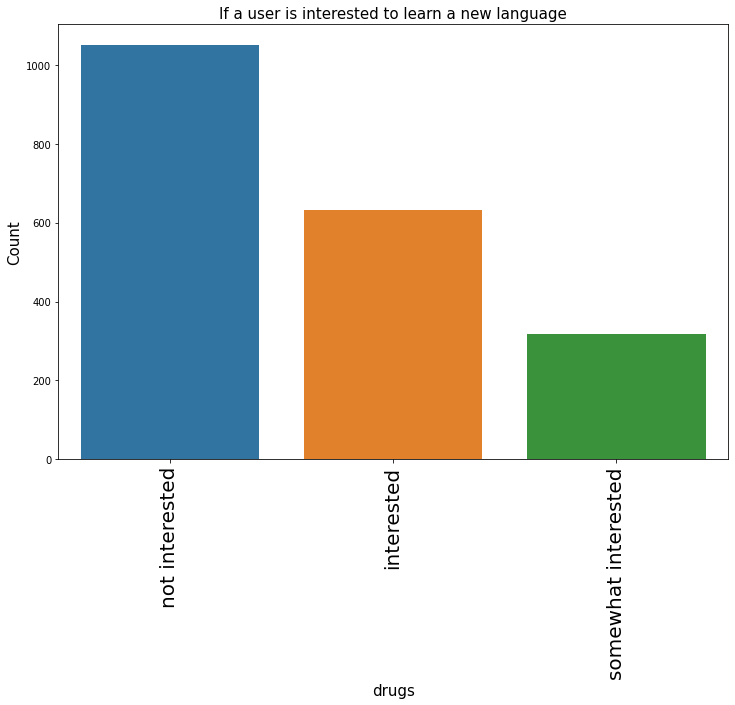

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(data.new_languages,order=(data.new_languages.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("drugs", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('If a user is interested to learn a new language',fontsize=15)
plt.show()

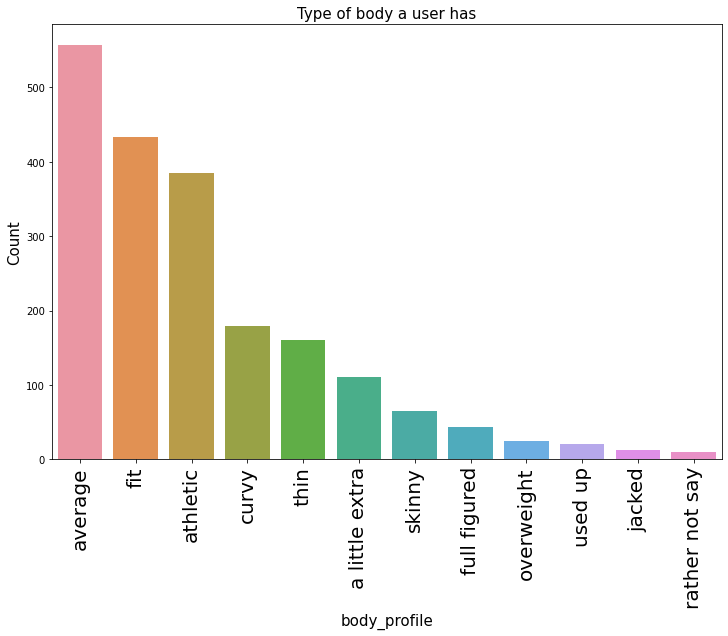

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(data.body_profile,order=(data.body_profile.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("body_profile", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Type of body a user has',fontsize=15)
plt.show()

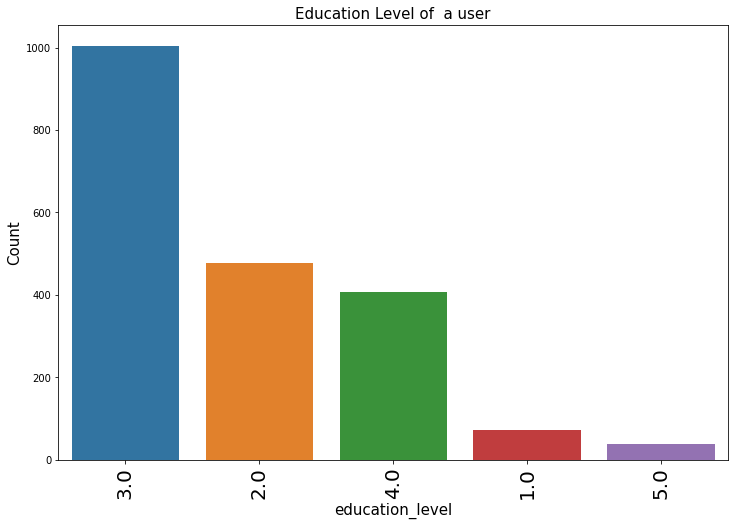

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(data.education_level,order=(data.education_level.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("education_level", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Education Level of  a user',fontsize=15)
plt.show()

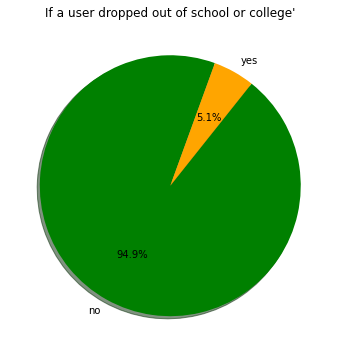

In [45]:
vc=data.dropped_out.value_counts()
vc.index
plt.figure(figsize=(10,6))
x=np.array(vc.index)
colors=['green','orange']
y=(np.array(vc/vc.sum()))*100
plt.pie(y, labels=x, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=70)
plt.title("If a user dropped out of school or college'")
x=np.array(vc.index)
plt.show()


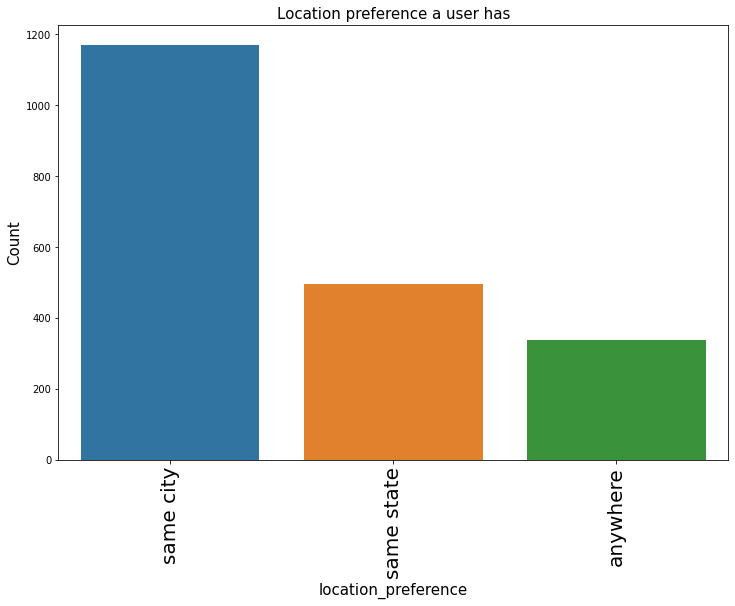

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(data.location_preference,order=(data.location_preference.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("location_preference", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Location preference a user has',fontsize=15)
plt.show()

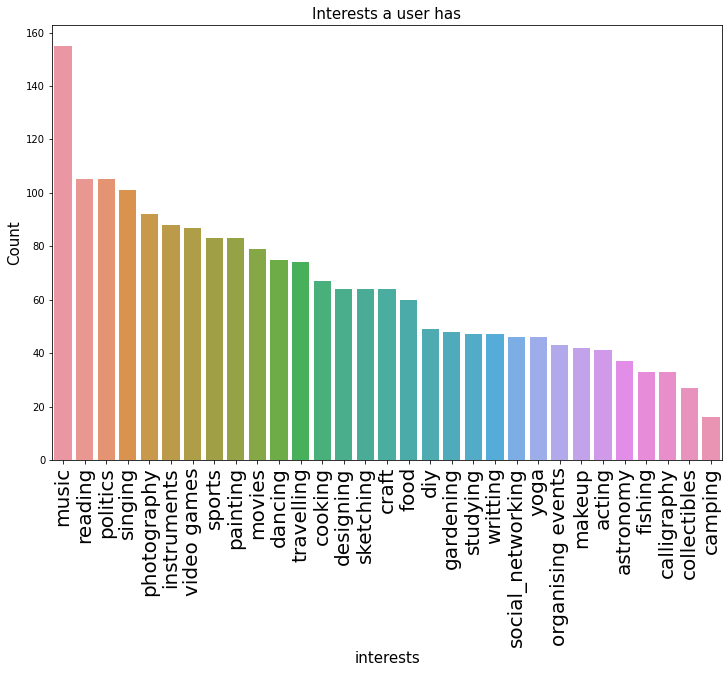

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data.interests,order=(data.interests.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("interests", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Interests a user has',fontsize=15)
plt.show()

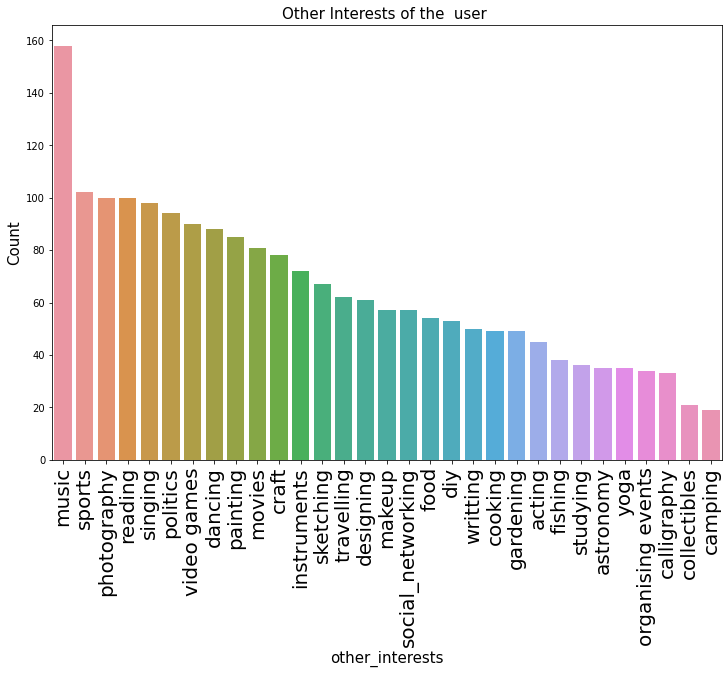

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(data.other_interests,order=(data.other_interests.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("other_interests", fontsize =15)
plt.xticks(rotation=90,fontsize=20)
plt.title('Other Interests of the  user ',fontsize=15)
plt.show()

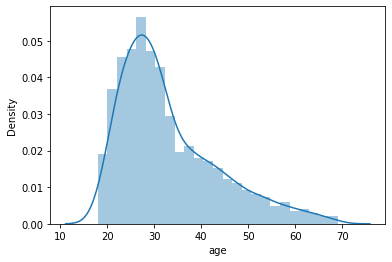

count    2001.000000
mean       33.072464
std        10.483189
min        18.000000
25%        26.000000
50%        30.000000
75%        39.000000
max        69.000000
Name: age, dtype: float64


In [46]:
#univariate analysis of age
sns.distplot(data['age'])
plt.show()
print('='*50)
print(data['age'].describe())

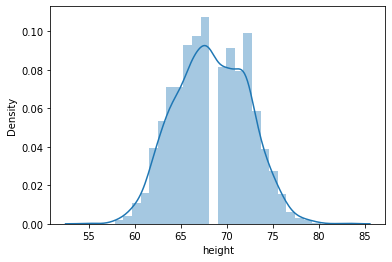

count    2001.000000
mean       68.289855
std         3.895246
min        55.000000
25%        65.000000
50%        68.000000
75%        71.000000
max        83.000000
Name: height, dtype: float64


In [47]:
#univariate analysis of height
sns.distplot(data['height'])
plt.show()
print('='*50)
print(data['height'].describe())

BIO

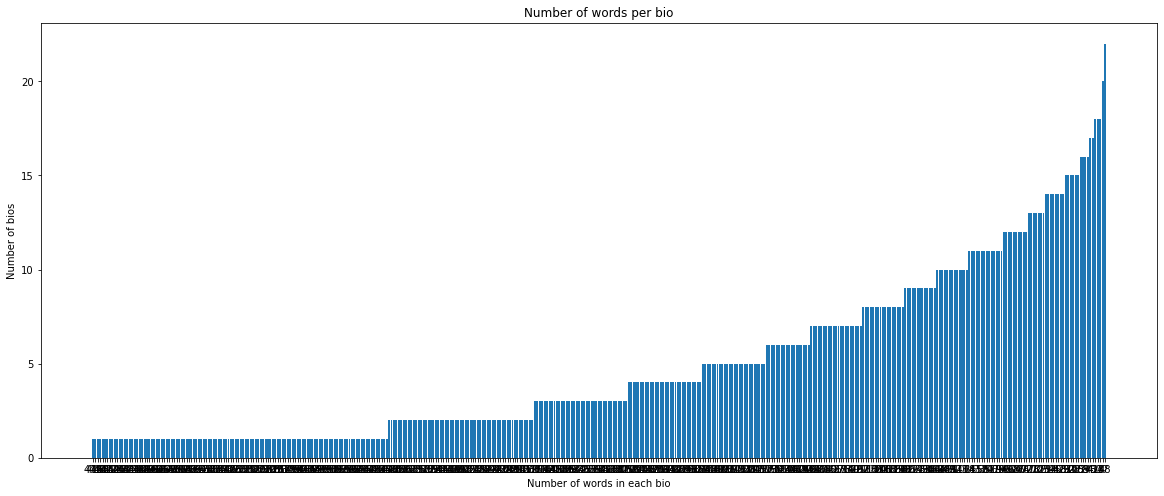

In [48]:
word_count = data['bio'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,8))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of bios')
plt.xlabel('Number of words in each bio')
plt.title('Number of words per bio')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

##Data preprocessing

In [90]:
data.body_profile.value_counts()

average           557
fit               433
athletic          385
curvy             179
thin              161
a_little_extra    110
skinny             65
full_figured       43
overweight         25
used_up            20
jacked             13
rather_not_say     10
Name: body_profile, dtype: int64

In [17]:
data.job=data.job.str.replace('/','_')
data.job=data.job.str.replace(' ','')

In [18]:
data.location=data.location.str.replace(',',' ')


In [19]:
data.location_preference=data.location_preference.str.replace(',','_')


In [20]:
data.other_interests=data.other_interests.str.replace(' ','_')


In [21]:
data.interests=data.interests.str.replace(' ','_')


In [22]:
data.pets=data.pets.str.replace(' ','_')


In [23]:
data.new_languages=data.new_languages.str.replace(' ','_')


In [24]:
data.body_profile=data.body_profile.str.replace(' ','_')


In [25]:
data.language=data.language.str.replace('(','')

data.language=data.language.str.replace(')','')

data.language=data.language.str.replace(' ','_')
data.language=data.language.str.replace(',',' ')


In [26]:
data.head(2)

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,-0.230769,single,f,gay,socially,never,-0.333333,medicine_health,...,no,english_fluently _spanish_poorly _sign_languag...,interested,athletic,1.0,no,bottom line love life work hard love hard eart...,sports,instruments,same state
1,fffe3200,Travis Young,-0.307692,single,m,gay,socially,never,0.000000,other,...,no,english_fluently _tagalog_okay _french_poorly,interested,fit,0.0,no,straightforward genuine fun loving not serious...,painting,instruments,anywhere


In [5]:
# https://stackoverflow.com/a/47091490/4084039

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [7]:
#printing a few random bios
print(10, data['bio'].values[10])
print('-'*50)
print(1033, data['bio'].values[1033])

10 i am a easy-going fun loving, compassionate person. my interests include reading, movies, live music and game night parties and potlucks. i hope to travel to europe and explore this wonderful world
--------------------------------------------------
1033 in moscow, i had my red october, now it's on to my summer of love! (major points if you know what that is.) just arrived in oakland (june 1), had to escape phoenix. it was already dante's inferno (108f!) and i'm allergic to melting flesh. so i headed for the beautiful bay area to see what journey was singing about. fun & feisty globetrotting girl lived in italy/europe 6 years professional dance and acting background i was in a country music video 4ever ago and recently found it online. i also still get facebook notices from people saying they saw me in "waiting to exhale". good4laffs!  former royal nanny (really)  int'l english teacher  worked in siberia (not in the gulag!) and moscow. russian philharmonic dance company guest teacher

In [8]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in nltk.word_tokenize(sent) if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [9]:
preprocessed_bio_data = preprocess_text(data['bio'].values)

100%|█████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:03<00:00, 531.09it/s]


In [10]:
#printing a few random bios
print(10, preprocessed_bio_data[10])
print('-'*50)
print(1033, preprocessed_bio_data[1033])
print('-'*50)

10 easy going fun loving compassionate person interests include reading movies live music game night parties potlucks hope travel europe explore wonderful world
--------------------------------------------------
1033 moscow red october summer love major points know arrived oakland june 1 escape phoenix already dante inferno 108f allergic melting flesh headed beautiful bay area see journey singing fun feisty globetrotting girl lived italy europe 6 years professional dance acting background country music video 4ever ago recently found online also still get facebook notices people saying saw waiting exhale good4laffs former royal nanny really int l english teacher worked siberia not gulag moscow russian philharmonic dance company guest teacher taught university students south korea yes really eat dawg makes fried silkworms seem blase ground zero volunteer fdny supporter hiked rainforest waterfall jungle boy guide goofy disneyland full useful info not high crack stayed convent sisters moth

In [11]:
data['bio'] = preprocessed_bio_data

In [113]:
# count each dish to see how many times each dish repeated
bio_data = []
for i in data.bio: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        bio_data.append(t)

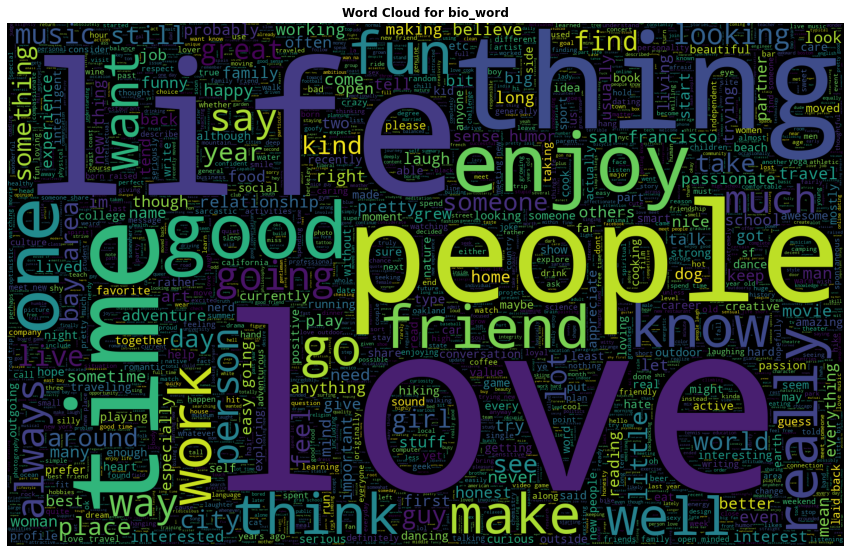

In [115]:
from wordcloud import WordCloud,STOPWORDS

bio_data_set = set(bio_data)
bio_word_cloud = ', '.join(bio_data_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(bio_word_cloud))
wc.generate(bio_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for bio_word',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

##Preprocessing Numerical Data

In [12]:
#AGE
scaler=RobustScaler()
scaler.fit(data['age'].values.reshape(-1,1))
data['age']=scaler.transform(data['age'].values.reshape(-1,1))

In [13]:
#HEIGHT
scaler=RobustScaler()
scaler.fit(data['height'].values.reshape(-1,1))
data['height']=scaler.transform(data['height'].values.reshape(-1,1))

In [14]:
#EDUCATION LEVEL
scaler=RobustScaler()
scaler.fit(data['education_level'].values.reshape(-1,1))
data['education_level']=scaler.transform(data['education_level'].values.reshape(-1,1))

In [15]:
if not os.path.isfile('/train1.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    data.to_csv("train1.csv", index=False)

In [16]:
data=pd.read_csv("train1.csv")

##Vectorizing Categorial features

In [153]:
tokenized_locations = [word_tokenize(data['location'][i]) for i in range(len(data['location']))]

In [156]:
def w2v_locations(location_i_tokenized):
    vectorized_location_i = 0
    for word in location_i_tokenized:
        try:
            vectorized_location_i += w2v[word]
        except:
            w2v[word] = np.zeros_like(w2v['word'])
        finally:
            vectorized_location_i += w2v[word]
    return vectorized_location_i

In [160]:
vectorized_locations = [w2v_locations(location_i_tokenized) for location_i_tokenized in tokenized_locations]

In [29]:
with open('./vectorized_locs.pickle' ,"rb", buffering=0) as f:
    vectorized_locations = pickle.load(f)

In [33]:
import os
os.chdir('C:\\Users\\bpash\\Downloads\\doc2vec\\doc2vec\\doc2vec')


##Word2Vec on 'language'

In [34]:
d2v = Doc2Vec.load("docvecmodel.d2v")

In [37]:
#vectorising the df['bio']
bio_vectorized = [d2v.docvecs[str(i)] for i in range(len(data['bio']))]

In [167]:
tokenized_langs = [word_tokenize(data['language'][i]) for i in range(len(data['language']))]

In [168]:
vectorized_language = [w2v_locations(location_i_tokenized) for location_i_tokenized in tokenized_langs]

In [169]:
with open('vectorized_langs.pickle', 'wb') as f:
    pickle.dump(vectorized_language, f)

In [27]:
with open('./vectorized_langs.pickle' ,"rb", buffering=0) as f:
    vectorized_language = pickle.load(f)

In [38]:
def ohe(feature):
    vectorizer = CountVectorizer(binary = True)
    vectorized_feature = vectorizer.fit_transform(feature.values)
    return vectorized_feature

In [39]:
status_vec=ohe(data.status)

In [40]:
orientation_vec=ohe(data.orientation)

In [41]:
drinks_vec = ohe(data['drinks'])


In [42]:
drugs_vec = ohe(data['drugs'])

In [43]:
job_vec = ohe(data['job'])

In [44]:
smokes_vec = ohe(data['smokes'])

In [45]:
pets_vec = ohe(data['pets'])

In [46]:
body_vec = ohe(data['body_profile'])

In [47]:
new_languages_vec = ohe(data['new_languages'])

In [48]:
dropped_vec = ohe(data['dropped_out'])

In [49]:
interests_vec = ohe(data['interests'])

In [50]:
other_interests_vec = ohe(data['other_interests'])

In [51]:
location_pref_vec = ohe(data['location_preference'])

In [52]:
data['sex'] = data['sex'].str.replace('m', 'male')
data['sex'] = data['sex'].str.replace('f', 'female')

sex_vec = ohe(data['sex'])

##Concatenating all the features

In [60]:
X=hstack((np.asarray(data['age']).reshape(-1,1), status_vec, sex_vec, orientation_vec, 
          drinks_vec, drugs_vec, np.asarray(data['height']).reshape(-1,1), job_vec, np.asarray(vectorized_locations), pets_vec, smokes_vec, new_languages_vec, body_vec,
          np.asarray(data['education_level']).reshape(-1,1), dropped_vec, np.asarray(bio_vectorized), 
          interests_vec, other_interests_vec, location_pref_vec, np.asarray(vectorized_language)))

In [61]:
similarity_mat= cosine_similarity(X)

In [62]:
similarity_mat_100 = similarity_mat*100

In [63]:
index_values = list(data['user_id'])
column_values = list(data['user_id'])
df_to_submit = pd.DataFrame(data = similarity_mat_100,  
                  index = index_values,  
                  columns = column_values)

In [65]:
df_to_submit.to_csv('submission1.csv',index=False)

In [66]:
df_to_submit

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
fffe3100,100.000000,81.333812,92.104995,58.201226,61.640468,75.710178,76.171575,76.573820,83.627490,72.587974,...,71.056214,78.824857,87.955662,58.279600,71.929328,65.582269,59.497388,55.562754,75.700131,81.946766
fffe3200,81.333812,100.000000,83.564474,64.153280,61.888097,78.185721,74.416778,75.035843,83.335118,73.633327,...,77.271614,81.566098,85.138990,55.839529,69.831059,60.330623,56.971449,72.959118,78.644013,80.076944
fffe3300,92.104995,83.564474,100.000000,54.744817,57.888679,70.552564,69.548290,69.623183,76.052382,72.972967,...,65.435027,74.000737,84.646993,50.272890,63.196458,57.166493,50.872453,48.299327,70.517748,73.608712
fffe3400,58.201226,64.153280,54.744817,100.000000,85.443866,78.290342,79.731868,80.375933,74.027041,66.411115,...,61.204303,68.907733,59.456765,72.170240,69.863368,80.451659,74.486219,70.863148,67.067382,68.067596
fffe3500,61.640468,61.888097,57.888679,85.443866,100.000000,79.034256,86.915037,86.464067,78.445280,66.922334,...,55.675286,69.276349,59.621711,74.604522,70.727954,90.886603,78.230761,69.223286,68.331105,72.846961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,65.582269,60.330623,57.166493,80.451659,90.886603,75.214029,83.789543,85.935111,78.530045,66.170548,...,59.267086,75.125495,63.889354,79.850421,76.462868,100.000000,83.910180,75.292092,73.532231,76.932838
fffe3100390039003800,59.497388,56.971449,50.872453,74.486219,78.230761,68.834907,74.108526,74.698479,69.087659,71.063604,...,56.092885,69.563207,68.777827,90.740431,85.204847,83.910180,100.000000,71.541994,80.284108,67.846897
fffe3100390039003900,55.562754,72.959118,48.299327,70.863148,69.223286,65.290852,67.798854,68.987285,65.328051,59.836729,...,58.009050,65.796418,57.068089,68.673112,67.704295,75.292092,71.541994,100.000000,64.995536,64.827309
fffe3200300030003000,75.700131,78.644013,70.517748,67.067382,68.331105,79.952833,78.894464,80.089382,85.516389,80.798118,...,79.048142,88.768749,87.264244,77.568122,86.325521,73.532231,80.284108,64.995536,100.000000,84.092511


In [69]:
ddf=pd.read_csv('submission.csv')

In [73]:
ddf['user_id']=ddf['Unnamed: 0']

In [75]:
ddf.drop('user_id',axis=1,inplace=True)

In [76]:
ddf.rename(columns = {'Unnamed: 0':'user_id'}, inplace = True) 

In [77]:
ddf.head()

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,fffe3100,100.000000,81.333812,92.104995,58.201226,61.640468,75.710178,76.171575,76.573820,83.627490,...,71.056214,78.824857,87.955662,58.279600,71.929328,65.582269,59.497388,55.562754,75.700131,81.946766
1,fffe3200,81.333812,100.000000,83.564474,64.153280,61.888097,78.185721,74.416778,75.035843,83.335118,...,77.271614,81.566098,85.138990,55.839529,69.831059,60.330623,56.971449,72.959118,78.644013,80.076944
2,fffe3300,92.104995,83.564474,100.000000,54.744817,57.888679,70.552564,69.548290,69.623183,76.052382,...,65.435027,74.000737,84.646993,50.272890,63.196458,57.166493,50.872453,48.299327,70.517748,73.608712
3,fffe3400,58.201226,64.153280,54.744817,100.000000,85.443866,78.290342,79.731868,80.375933,74.027041,...,61.204303,68.907733,59.456765,72.170240,69.863368,80.451659,74.486219,70.863148,67.067382,68.067596
4,fffe3500,61.640468,61.888097,57.888679,85.443866,100.000000,79.034256,86.915037,86.464067,78.445280,...,55.675286,69.276349,59.621711,74.604522,70.727954,90.886603,78.230761,69.223286,68.331105,72.846961


In [79]:
ddf.to_csv('submission2.csv',index=False)